# **Group 7 - Credit Score Classification**


---


Sabrina Akter , Manish Gurung , Katya Kasalobava

The EDA part in this file is cumulation of all the code in previous project Part A

**Link To Dataset **- https://www.kaggle.com/datasets/parisrohan/credit-score-classification

**Purpose of the Dataset**

The dataset is likely collected for the purpose of analyzing consumer financial behavior and assessing credit risk. It contains detailed information about individuals' financial activities, including income, debt, credit utilization, and payment behavior. This type of dataset is typically used by financial institutions to:

*   Assess Credit Risk: Evaluate the likelihood of individuals defaulting on loans or credit payments.

*   Understand Consumer Behavior: Gain insights into how different financial factors, such as income and debt, affect consumer credit scores and financial stability.

*  Improve Lending Decisions: Make informed lending decisions by identifying high-risk and low-risk individuals.

*  Develop Financial Products: Tailor financial products and services to meet the needs of different customer segments.

The dataset's ultimate goal is to improve the accuracy of credit scoring models and enhance the ability of financial institutions to manage credit risk effectively.

**Defining and Measuring Outcomes**

Outcomes of Interest:

*  Credit Score Classification: Classifying individuals into credit score categories such as "Good," "Standard," and "Poor."

*  Prediction of Financial Risk: Identifying individuals who are likely to default or experience financial distress.

Measuring Outcomes:

*  Classification Accuracy: The percentage of correctly classified credit scores. High accuracy indicates a good prediction algorithm.

*  Precision and Recall: Precision measures the correctness of positive predictions, while recall measures the algorithm's ability to identify all positive instances.

*  F1-Score: The harmonic mean of precision and recall, providing a balance between the two.

*  AUC-ROC Curve: Area Under the Receiver Operating Characteristic curve, measuring the algorithm's ability to distinguish between classes.

**Effectiveness of a Prediction Algorithm**:

*  Cross-Validation: Use cross-validation techniques to evaluate the algorithm's performance across different subsets of the data.

*  Confusion Matrix: Analyze true positives, true negatives, false positives, and false negatives to understand the algorithm's performance in detail.

*  Model Interpretability: Ensure the model provides interpretable results that can be used to make informed decisions.

**Effectiveness of a Clustering Algorithm**

If clustering is applied to segment customers based on financial behavior:

*  Silhouette Score: Measures how similar an object is to its cluster compared to other clusters. A higher silhouette score indicates better-defined clusters.

*  Inertia or Within-Cluster Sum of Squares: Measures the compactness of clusters. Lower inertia indicates more compact clusters.

*  Davies–Bouldin Index: Evaluates the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

*  Cluster Interpretability: Ensure clusters are meaningful and can be used to derive actionable insights for business decisions.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,recall_score as recall_func,f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [15]:
df = pd.read_csv("train.csv")
# removing any null values
col = df.columns
for i in range(len(col)):
    print(df[col[i]].isnull().sum())
    df.dropna(subset=col[i],inplace=True)
df = df.drop(df[df["Payment_Behaviour"] == '!@9#%8'].index)
df = df.drop(df[df["Occupation"] == '_______'].index)
df = df.drop(df[df["Credit_Mix"] == '_'].index)
df = df.drop(df[df["Payment_of_Min_Amount"] == '_'].index)
enc = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
lec = LabelEncoder()
df_cleaned_partial = df
df_cleaned_partial=df_cleaned_partial.iloc[:,0:28]
df_cleaned_partial.head(5)
# NM -0 , No -1, Yes - 2
df_cleaned_partial["Payment_of_Min_Amount"].unique()
df_cleaned_partial["Payment_of_Min_Amount"] = lec.fit_transform(df_cleaned_partial["Payment_of_Min_Amount"])
df_cleaned_partial["Payment_Behaviour"].value_counts()
df1 = enc.fit_transform(df_cleaned_partial["Payment_Behaviour"].values.reshape(-1,1))
df_cleaned_partial.reset_index(drop=True,inplace=True)
encoded = pd.DataFrame(df1,columns=enc.get_feature_names_out(["Payment Behaviour"]))
df_cleaned_partial.drop("Payment_Behaviour",axis=1,inplace=True)
df_encoded = pd.concat([df_cleaned_partial,encoded],axis=1)

C:\Users\manis\AppData\Local\Temp\ipykernel_40208\3053717174.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


0
0
0
9985
0
0
0
0
13529
0
0
0
0
8677
0
4740
0
1214
0
0
0
5600
0
0
2511
0
695
0


In [16]:
df_encoded["Credit_Mix"] = lec.fit_transform(df_cleaned_partial["Credit_Mix"])
df_encoded["Credit_Mix"].value_counts() # 2- standard, 1 - good, 0-bad
pd.set_option('display.max_columns', None)

In [17]:
def convert_credit_history_age(age_str):
    years, months = 0, 0
    if isinstance(age_str, str):
        if 'Years' in age_str:
            years = int(age_str.split(' Years')[0])
        if 'Months' in age_str:
            months = int(age_str.split(' ')[-2])
    return years * 12 + months


In [18]:
df_encoded['Credit_History_Months'] = df_encoded['Credit_History_Age'].apply(convert_credit_history_age)
df_encoded.drop("Credit_History_Age",axis=1,inplace=True)


In [19]:
def simplify_loan_type(loan_type):
    if isinstance(loan_type, str):
        if 'Auto' in loan_type:
            return 'Auto Loan'
        elif 'Home' in loan_type or 'Mortgage' in loan_type:
            return 'Home Loan'
        elif 'Personal' in loan_type:
            return 'Personal Loan'
        else:
            return 'Other Loan'
    else:
        return 'Other Loan'

# Apply the function
df_encoded['Simplified_Loan_Type'] = df_encoded['Type_of_Loan'].apply(simplify_loan_type)

print(df_encoded['Simplified_Loan_Type'].unique())
print(df_encoded['Simplified_Loan_Type'].value_counts())


['Auto Loan' 'Other Loan' 'Home Loan' 'Personal Loan']
Simplified_Loan_Type
Home Loan        13710
Auto Loan        12405
Other Loan        6844
Personal Loan     3515
Name: count, dtype: int64


In [20]:
df_encoded.drop(["Type_of_Loan"],axis=1,inplace=True)
df_encoded["Simplified_Loan_Type"] = lec.fit_transform(df_encoded["Simplified_Loan_Type"])
df_encoded["Simplified_Loan_Type"].value_counts() # 1 - Home loan, 0 - Auto Loan, 3 - Personal Loan, 2 - other loan

Simplified_Loan_Type
1    13710
0    12405
2     6844
3     3515
Name: count, dtype: int64

In [21]:
training_set = df_encoded.iloc[:,7:]

In [22]:
training_set.dropna(inplace=True)

In [23]:
def remove_underscores_from_column(df, column_name):
    def clean_value(value):
        if isinstance(value, str):
            cleaned_value = value.replace('_', '')
            return float(cleaned_value) if cleaned_value else None
        return value

    df[column_name] = df[column_name].apply(clean_value)
    return df


In [24]:
u_col = ['Annual_Income','Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
       'Monthly_Balance']
for col in u_col:
    remove_underscores_from_column(training_set,col)

In [25]:
for col in u_col:
    training_set[col].astype('float64')
remove_underscores_from_column(training_set,"Num_of_Loan")
remove_underscores_from_column(training_set,"Num_of_Delayed_Payment")
training_set["Num_of_Loan"].astype('int64')
training_set["Num_of_Delayed_Payment"].astype('int64')


0         8
1         1
2         1
3         0
4         4
         ..
36469    12
36470    26
36471    25
36472    25
36473     6
Name: Num_of_Delayed_Payment, Length: 36474, dtype: int64

In [26]:
training_set.to_csv("training_set.csv",index=False)

In [35]:
y = training_set['Credit_Score']
training_set.drop('Credit_Score',axis=1,inplace=True)
X = training_set

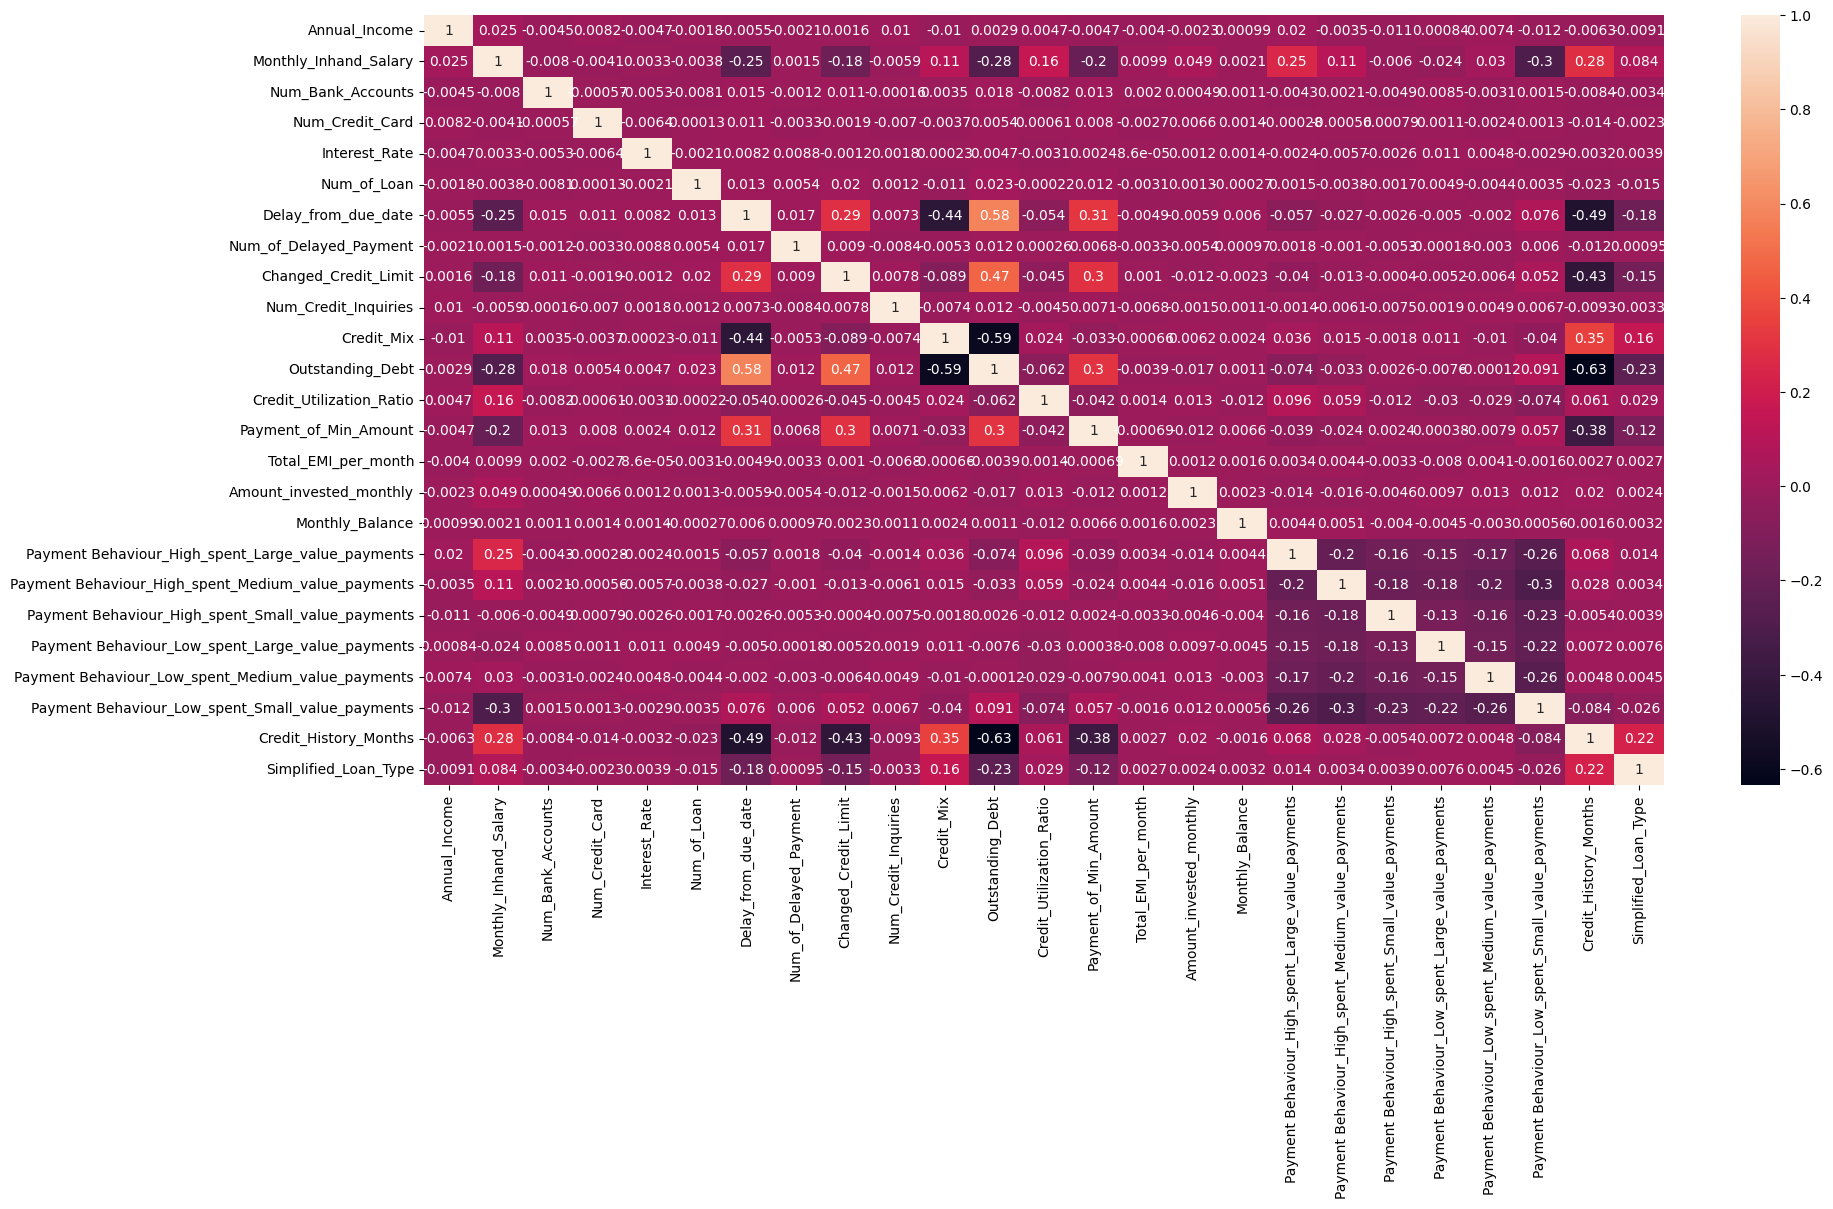

In [36]:
corr_data=X.corr(method="pearson")
plt.figure(figsize=(20,10))
sns.heatmap(corr_data,annot=True)
plt.show()


#Simple outline of what was done  in this notebook

Step 1 :: Get an estimate on classififer models using LazyClassifier

Step 2 :: Only Selecting ones with highest accuracy

Step 3 :: Perform Accuracy Testing by scaling data and dimensionality reduction

Step 4 :: Perform Hyperparameter tunning on selected model.

Step 5 :: Compare Results

Step 6 :: Train Neural Network for comparsion

Step 7 :: Hyperparameter tunning on NN

Step 8 :: Compare result with supervised learning model vs Neural Network

Step 9 :: Prepare voting classififer to get the best output by voting on output
          of all the models.

Step 10 :: the END

**Big Picture of the Project**  
Credit scores are crucial in determining financial opportunities for individuals, affecting loan approvals, interest rates, and even job prospects. Our project focuses on accurately classifying credit scores into categories like 'good,' 'standard,' or 'poor,' which is essential for fair and effective financial decision-making.

**Motivation for the Problem**  
Accurate credit score classification is vital because it directly impacts both lenders and consumers, affecting financial stability and access to services. Misclassification can lead to high-risk lending or unfair denial of opportunities, making precise credit scoring crucial for a fair and functioning financial system.

**High-Level Description of the Problem**  
We aim to classify credit scores using a dataset that includes features such as payment history, debt, income, and credit utilization. By building a predictive model, we can categorize individuals' credit scores into 'good,' 'standard,' or 'poor,' providing an automated and accurate assessment of creditworthiness.

**Why Should We Care?**  
Accurate credit score classification reduces financial risks, ensures fair access to credit, and helps individuals make better financial choices. This project promotes a more inclusive and equitable financial industry, benefiting both consumers and financial institutions.

**Details of Methodology and Techniques used in this Project**

Importing all Libraries needed

We are using all 3 score beacuse this will help see how our model is doing and we are keeping f1 score in account as the most important one beacuse of it using both accuracy and recall score

**Scaling and Dimensionality Reduction Techniques.**
- Here we did not use LDA and NCA for dimnesionality reduction as both of the techniques are highly time consuming and with amount of data in our training set, it will take too long to converge.

- Here we used train test split, to get the data into sections for training and testing for initial stage

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay


LazyClassifier is used in order to get initial report on different classifier and to choose the ones which has higher accuracy rate.

In [3]:
df = pd.read_csv("training_set.csv")


In [4]:
y = df['Credit_Score']
df.drop('Credit_Score',axis=1,inplace=True)
X= df

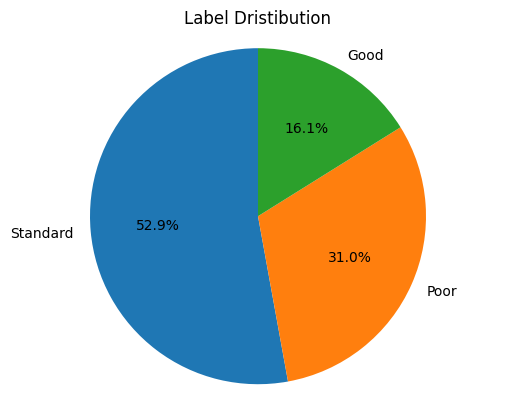

In [8]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title("Label Dristibution")
plt.show()

# **Splitting Data**


---
At first we make use of train_test_split because we need to see the initial report on data, we make use of Stratisfiedkfold later while training our final model.



In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

As seen above from the result of the clasfification test, we can assume that the higher accuracy models are gonna give us greater result once we find the best parameter for them.

# **MODEL SELECTION**

---
We get all the needed models, here we make use of 11 different models. Then as from the majority of highest accuracy each one give , we reduce the model to only the ones we need.


In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [36]:
ada= AdaBoostClassifier()
bag = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight=None,criterion='gini',max_depth=None))
hist = HistGradientBoostingClassifier()
grad = GradientBoostingClassifier()
rand = RandomForestClassifier()
deci = DecisionTreeClassifier()
knn = KNeighborsClassifier()
extc = ExtraTreesClassifier()
mlp = MLPClassifier()
lgb = LGBMClassifier()

In [38]:
models = [("AdaBoost", ada), ("Bagging", bag), ("HistGradientBoosting", hist),
          ("GradientBoosting", grad), ("RandomForest", rand),
          ("DecisionTree", deci), ("KNN", knn), ("ExtraTrees", extc),("LGBMClassifier",lgb)]

Here is one crucial part of the Model training and testing process. Following steps shows usage of scaling and Dimensionalty reduction on the models selected.

1 . NO SCALING , NO DIMENSIONALITY REDUCTION

In [39]:
accuracy = []

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.6682530795072789


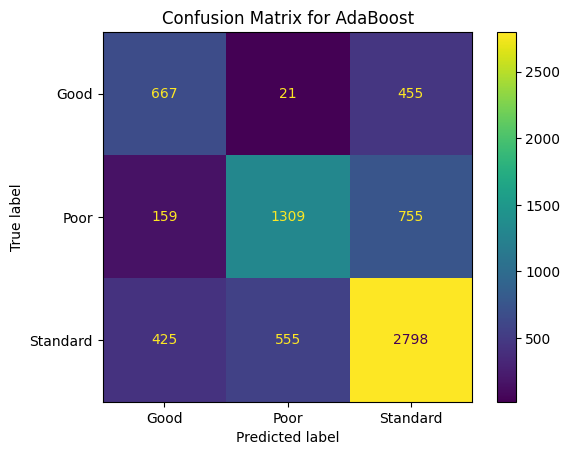

accuracy_score for Bagging :: 0.7427211646136618


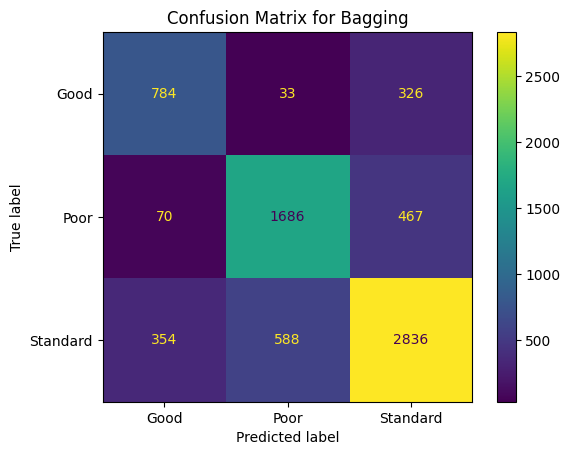

accuracy_score for HistGradientBoosting :: 0.7305431131019037


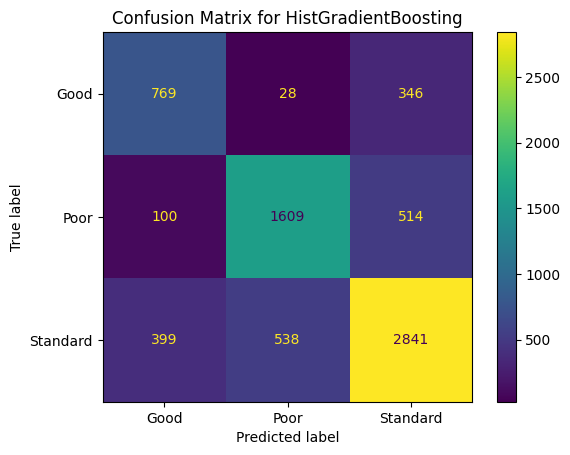

accuracy_score for GradientBoosting :: 0.711926091825308


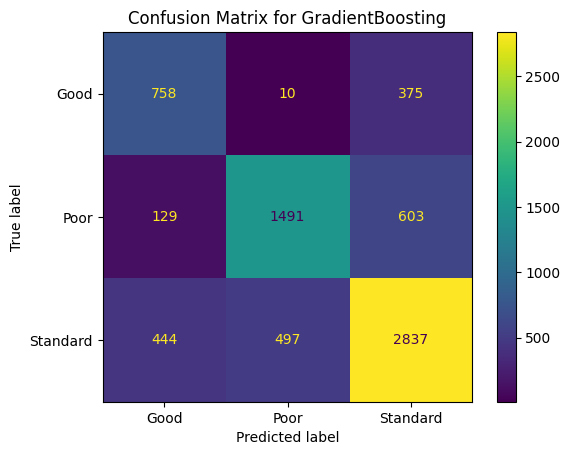

accuracy_score for RandomForest :: 0.7715565509518477


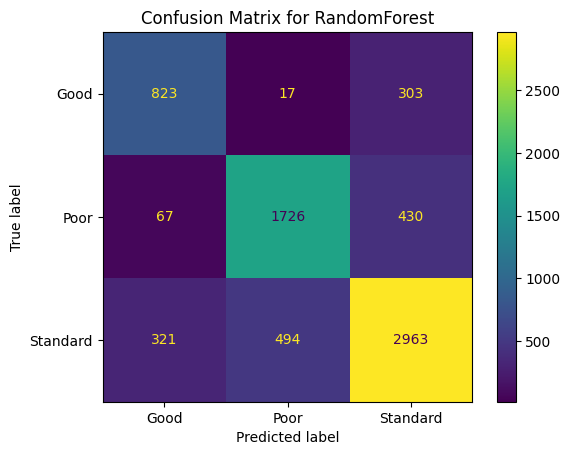

accuracy_score for DecisionTree :: 0.661114221724524


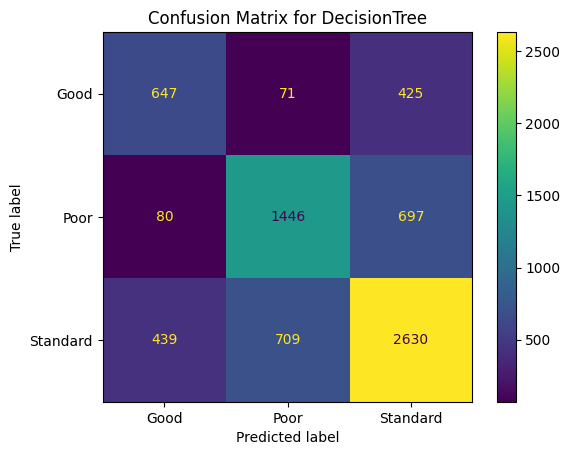

accuracy_score for KNN :: 0.6286394176931691


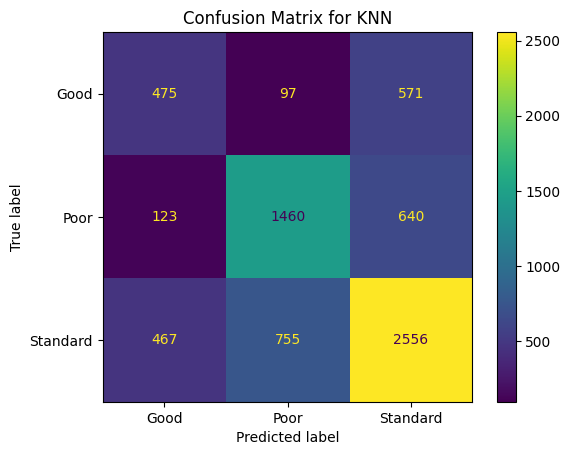

accuracy_score for ExtraTrees :: 0.7351623740201568


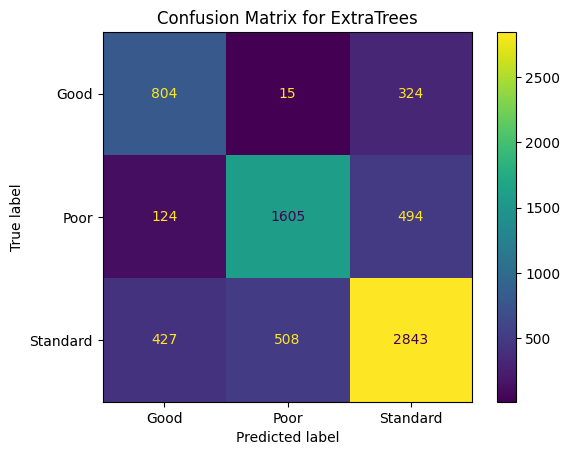

accuracy_score for LGBMClassifier :: 0.731942889137738


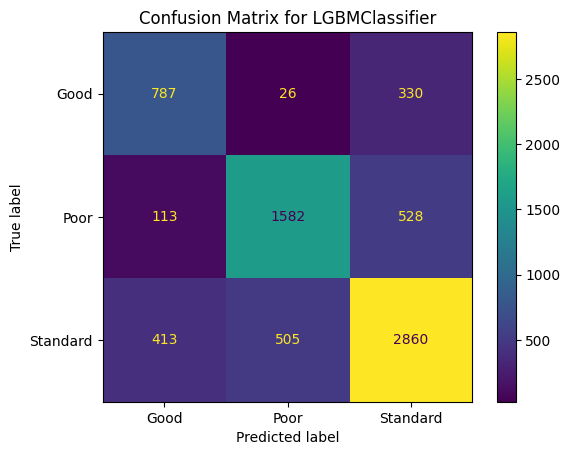

In [40]:
for i , (name,model) in enumerate(models):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_s = accuracy_score(y_test,y_pred)
    accuracy.append((name,accuracy_s))
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


2 . STANDARD SCALING, NO DIMENSIONALITY REDUCTION

In [ ]:
for i , (name,model) in enumerate(models):
    mod = make_pipeline(StandardScaler(),model)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.6627467450650987
accuracy_score for Bagging :: 0.7438051238975221
accuracy_score for HistGradientBoosting :: 0.7327453450930982
accuracy_score for GradientBoosting :: 0.7137057258854823
accuracy_score for RandomForest :: 0.7692846143077139
accuracy_score for DecisionTree :: 0.6749265014699706
accuracy_score for KNN :: 0.629287414251715
accuracy_score for ExtraTrees :: 0.7302253954920902


3 . STANDARD SCALING AND PCA

In [ ]:
for i , (name,model) in enumerate(models):
    mod = make_pipeline(StandardScaler(),PCA(),model)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.634887302253955
accuracy_score for Bagging :: 0.6497270054598908
accuracy_score for HistGradientBoosting :: 0.6698866022679546
accuracy_score for GradientBoosting :: 0.6635867282654347
accuracy_score for RandomForest :: 0.6640067198656027
accuracy_score for DecisionTree :: 0.5746885062298754
accuracy_score for KNN :: 0.629287414251715
accuracy_score for ExtraTrees :: 0.6635867282654347


4 . MINMAXSCALAR , NO DIMENSIONALITY REDUCTION

In [ ]:
for i , (name,model) in enumerate(models):
    mod = make_pipeline(MinMaxScaler(),model)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.6598068038639228
accuracy_score for Bagging :: 0.742685146297074
accuracy_score for HistGradientBoosting :: 0.7404451910961781
accuracy_score for GradientBoosting :: 0.7127257454850903
accuracy_score for RandomForest :: 0.7678846423071538
accuracy_score for DecisionTree :: 0.6827663446731065
accuracy_score for KNN :: 0.6360072798544029
accuracy_score for ExtraTrees :: 0.7337253254934901


5. MINMAX SCALAR AND PCA

In [ ]:
for i , (name,model) in enumerate(models):
    mod = make_pipeline(MinMaxScaler(),PCA(),model)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.620887582248355
accuracy_score for Bagging :: 0.6581268374632507
accuracy_score for HistGradientBoosting :: 0.6774464510709786
accuracy_score for GradientBoosting :: 0.6623267534649308
accuracy_score for RandomForest :: 0.6752064958700826
accuracy_score for DecisionTree :: 0.5863082738345233
accuracy_score for KNN :: 0.6360072798544029
accuracy_score for ExtraTrees :: 0.6684866302673946


6. ROBUSTSCALAR . NO DIMENSIONALITY REDUCTION

In [ ]:
for i , (name,model) in enumerate(models):
    mod = make_pipeline(RobustScaler(),model)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.6606467870642587
accuracy_score for Bagging :: 0.7461850762984741
accuracy_score for HistGradientBoosting :: 0.7334453310933782
accuracy_score for GradientBoosting :: 0.7125857482850343
accuracy_score for RandomForest :: 0.7670446591068178
accuracy_score for DecisionTree :: 0.6717065658686826
accuracy_score for KNN :: 0.626487470250595
accuracy_score for ExtraTrees :: 0.7333053338933221


7 . ROBUST SCALAR AND PCA

In [ ]:
for i , (name,model) in enumerate(models):
    mod = make_pipeline(RobustScaler(),PCA(),model)
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    print(f"accuracy_score for {name} :: {accuracy_score(y_test,y_pred)}")

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score for AdaBoost :: 0.6435671286574268
accuracy_score for Bagging :: 0.6942461150776984
accuracy_score for HistGradientBoosting :: 0.7062858742825143
accuracy_score for GradientBoosting :: 0.6880862382752345
accuracy_score for RandomForest :: 0.7200055998880023
accuracy_score for DecisionTree :: 0.6157076858462831
accuracy_score for KNN :: 0.16113677726445472
accuracy_score for ExtraTrees :: 0.7029259414811704


As seen from results above, we can see and verify that he accuracy rate with scaling and PCA did not help us at all, instead it lowered our accuracy rate by some points which we do not want.

**And why is that?**

1. Classification models generally are not sensitive to scaling, mening it won't matter that much if we were to scale the data or not.

2. Even with PCA, it won't matter as the nature of our dataset only has 2,3 columns that have positive correlation to each other.

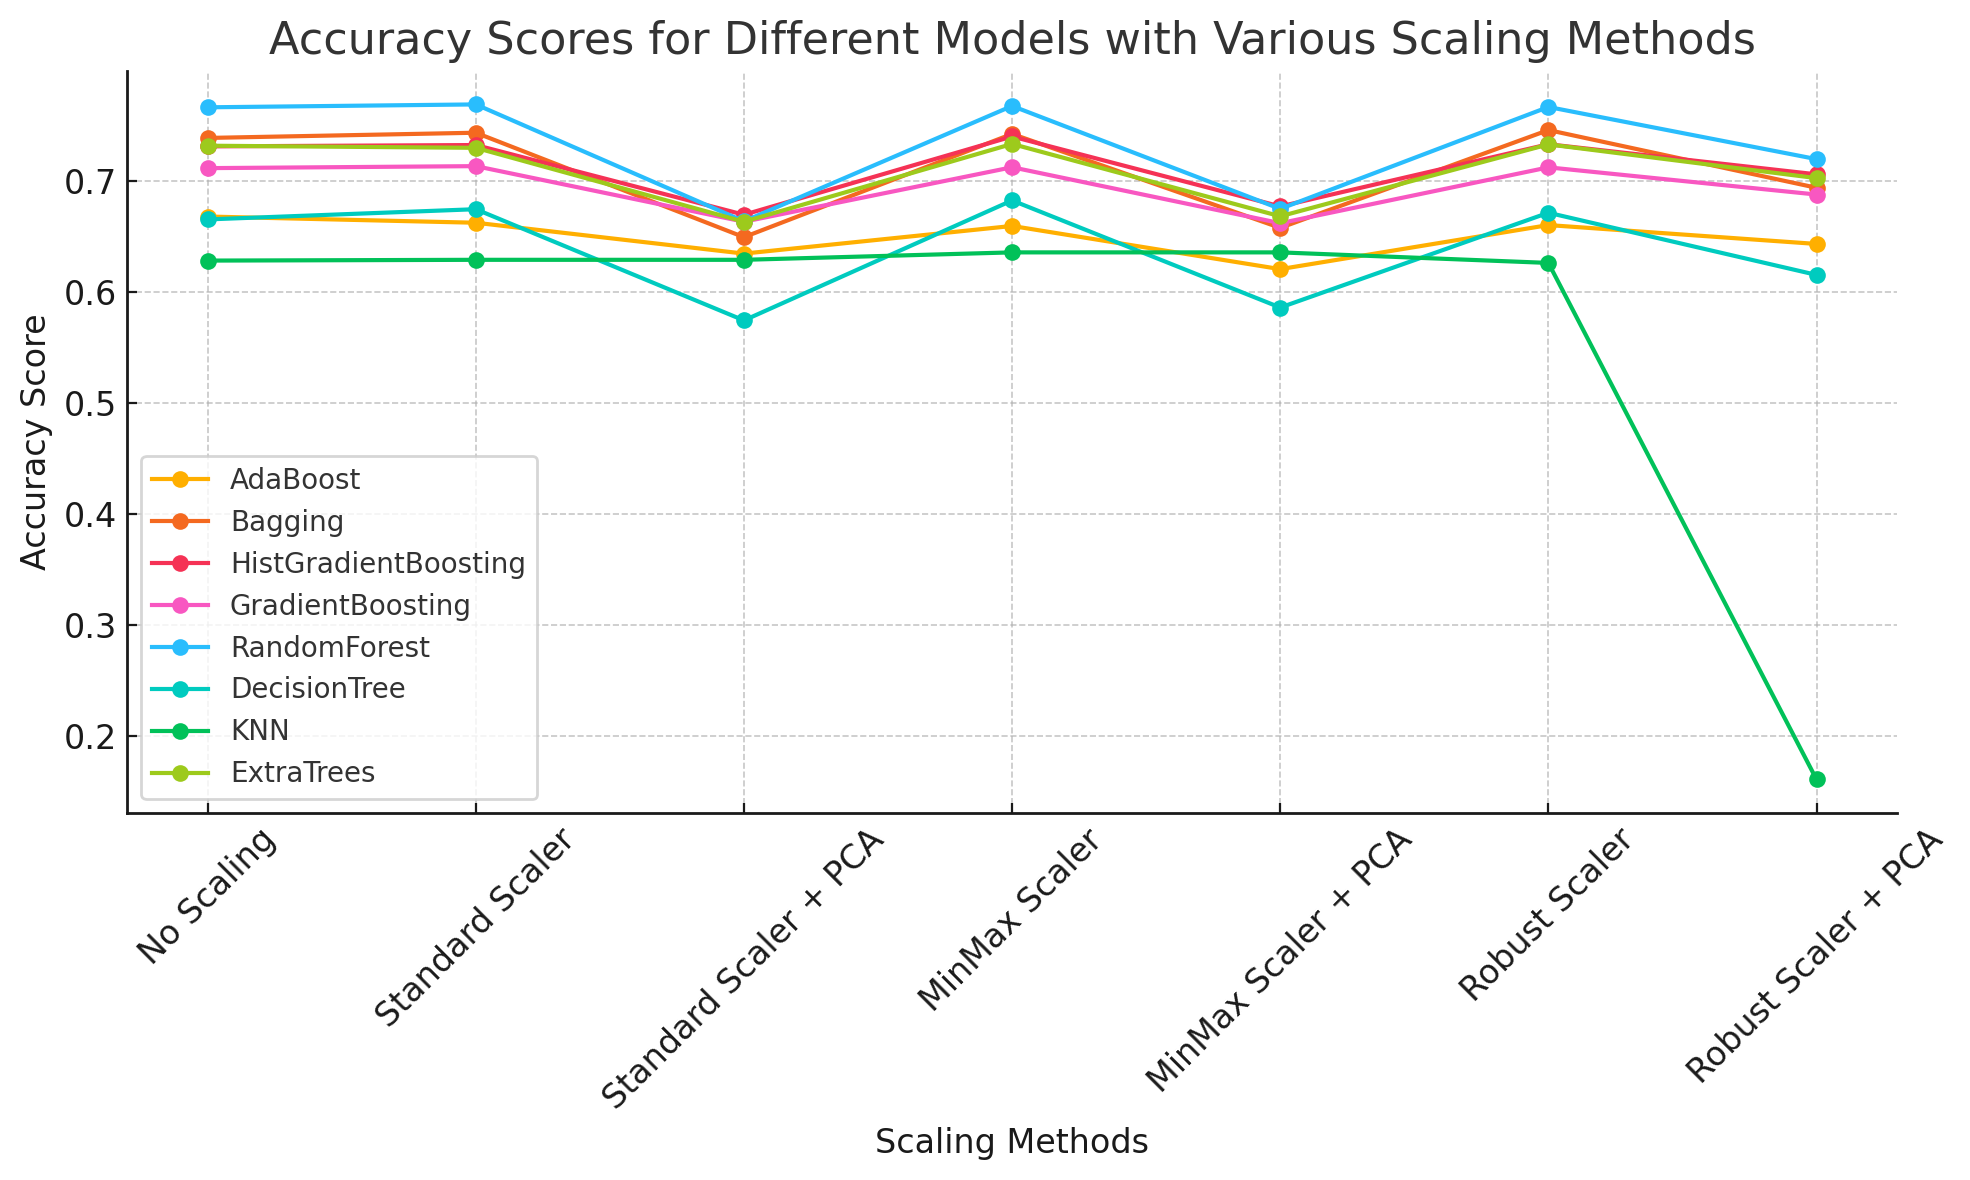

# **HYPERPARAMETER TUNNING**

---



- here we define different paramter values for our selected model for better result.

In [10]:
param_grid_bagging = {'n_estimators':[10,100,500,1000],'bootstrap':[True],
                      'max_samples':[0.7,0.8,0.9]}
param_grid_hist = {'loss':['log_loss'],'learning_rate':[0.1,0.01,0.001],
                   'max_depth':[None,3,5],'l2_regularization':[0.0,0.1,1.0],
                   'max_bins':[255,512]}
param_grid_gradient = {'loss':['log_loss'],'learning_rate':[0.1,0.01,0.001],
                    'n_estimators':[100,500,1000],'criterion':['friedman_mse'],
                    'max_depth':[3,6,9],'max_features':['sqrt','log2']}
param_grid_random = {'n_estimators':[100,500,1000],'criterion':['gini','entropy'],
                     'max_depth':[2,4,6,8,10]}
param_grid_trees  = {'n_estimators':[100,500,1000],'criterion':['gini','entropy'],
                     'max_depth':[2,4,6,8,10],'max_features':['sqrt','log2',None]}
param_grid_lgbm = {'boosting_type':['gbdt','dart','rf'],'max_depth':[-1,10,20],
                   'learning_rate':[0.001,0.01,0.1],'n_estimators':[100,500,1000],
                   'class_weight':['balanced',None]}
param_grid_mlp = {'hidden_layer_sizes':[100,200],'activation':['logistic','relu'],
                  'solver':['sgd','adam']}

In [11]:
model1 = GridSearchCV(BaggingClassifier(),param_grid=param_grid_bagging,verbose=2,cv=15)
model2 = GridSearchCV(HistGradientBoostingClassifier(),param_grid=param_grid_hist,verbose=2,cv=15)
model3 = GridSearchCV(GradientBoostingClassifier(),param_grid=param_grid_gradient,verbose=2,cv=15)
model4 = GridSearchCV(RandomForestClassifier(),param_grid=param_grid_random,verbose=2,cv=15)
model5 = GridSearchCV(ExtraTreesClassifier(),param_grid=param_grid_trees,verbose=2,cv=15)
model6 = GridSearchCV(LGBMClassifier(),param_grid=param_grid_lgbm,verbose=2,cv=15)

In [ ]:
model1.fit(X_train,y_train)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.3s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.2s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.2s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.3s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.3s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.3s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.3s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.3s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.2s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.4s
[CV] END ...bootstrap=True, max_samples=0.7, n_estimators=10; total time=   2.6s
[CV] END ...bootstrap=True, max_samples=0.7, n

GridSearchCV(cv=15, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True], 'max_samples': [0.7, 0.8, 0.9],
                         'n_estimators': [10, 100, 500, 1000]},
             verbose=2)

In [ ]:
model2.fit(X_train,y_train)

Fitting 15 folds for each of 54 candidates, totalling 810 fits
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.2s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.3s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.3s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.2s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.2s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.2s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.3s
[CV] END l2_regularization=0.0, learning_rate=0.1, loss=log_loss, max_bins=255, max_depth=None; total time=   1.8s
[CV] END l2_regul

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

GridSearchCV(cv=15, estimator=HistGradientBoostingClassifier(),
             param_grid={'l2_regularization': [0.0, 0.1, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['log_loss'], 'max_bins': [255, 512],
                         'max_depth': [None, 3, 5]},
             verbose=2)

In [ ]:
model3.fit(X_train,y_train)

Fitting 15 folds for each of 54 candidates, totalling 810 fits
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; total time=   7.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; total time=   6.6s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; total time=   6.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; total time=   6.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; total time=   6.3s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; total time=   6.2s
[CV] END criterion=friedman_mse, learning_rate=0.1, loss=log_loss, max_depth=3, max_features=sqrt, n_estimators=100; tota

GridSearchCV(cv=15, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['log_loss'], 'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [ ]:
model4.fit(X_train,y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.9s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.9s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END ......criterion=gini, max_depth=2, n_

GridSearchCV(cv=15, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [ ]:
model5.fit(X_train,y_train)

Fitting 15 folds for each of 90 candidates, totalling 1350 fits
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0

GridSearchCV(cv=15, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [ ]:
model6.fit(X_train,y_train)

Fitting 15 folds for each of 162 candidates, totalling 2430 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3538
[LightGBM] [Info] Number of data points in the train set: 26667, number of used features: 25
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[CV] END boosting_type=gbdt, class_weight=balanced, learning_rate=0.001, max_depth=-1, n_estimators=100; total time=   0.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3537
[Lig

c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\sklearn.py", line 1284, in fit
    super().fit(
  File "c:\Users\manis\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\sklearn.py", line 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=15, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['gbdt', 'dart', 'rf'],
                         'class_weight': ['balanced', None],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [-1, 10, 20],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

- all this hyperparameter tunning took more than 30 hours in total.

Below is our best model with best possible parameter to fit our training set and provide us with the best accuracy and f1 score.

In [12]:
mod1 = BaggingClassifier(max_samples=0.9, n_estimators=1000)
mod2 = HistGradientBoostingClassifier(l2_regularization=1.0)
mod3 = GradientBoostingClassifier(max_depth=9, max_features='sqrt', n_estimators=500)
mod4 = RandomForestClassifier(max_depth=10, n_estimators=500)
mod5 = ExtraTreesClassifier(max_depth=10, max_features=None, n_estimators=1000)
mod6 = LGBMClassifier(class_weight='balanced', max_depth=10, n_estimators=1000,force_col_wise =True,verbose=-1)

This following step is to test out the model and see their accuracy score, recall score and f1 score respectively.


In [13]:
cv_model = {
    ('Bagging Classifier', mod1),
    ('Hist Gradient', mod2),
    ('Gradient Boosting', mod3),
    ('Random Forest', mod4),
    ('LIGHT GBM Classifier', mod6)
}


In [14]:
model_names = ['Random Forest','LIGHT GBM CLassifier','Gradient Boosting','Hist Gradient','Bagging Classifer']
accuracy_scores = []
recall_scores = []
f_scores = []

In [41]:
for name,model in cv_model:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    recall_scores.append(recall_func(y_test,y_pred,average="weighted"))
    f_scores.append(f1_score(y_test,y_pred,average="weighted"))
    print(f"{name} :: Accuracy Score {accuracy_score(y_test,y_pred)}")
    print(f"{name} :: Recall Score {recall_func(y_test,y_pred,average='weighted')}")
    print(f"{name} :: F1 Score {f1_score(y_test,y_pred,average='weighted')}\n")

Random Trees :: Accuracy Score 0.7203247480403135
Random Trees :: Recall Score 0.7203247480403135
Random Trees :: F1 Score 0.7232724369254778

LIGHT GBM Classifier :: Accuracy Score 0.7554591265397537
LIGHT GBM Classifier :: Recall Score 0.7554591265397537
LIGHT GBM Classifier :: F1 Score 0.7567202434287902

Gradient Boosting :: Accuracy Score 0.768057110862262
Gradient Boosting :: Recall Score 0.768057110862262
Gradient Boosting :: F1 Score 0.7676765210524757

Hist Gradient :: Accuracy Score 0.734602463605823
Hist Gradient :: Recall Score 0.734602463605823
Hist Gradient :: F1 Score 0.7353569089028725

Bagging Classifier :: Accuracy Score 0.7669372900335947
Bagging Classifier :: Recall Score 0.7669372900335947
Bagging Classifier :: F1 Score 0.7673778203009808



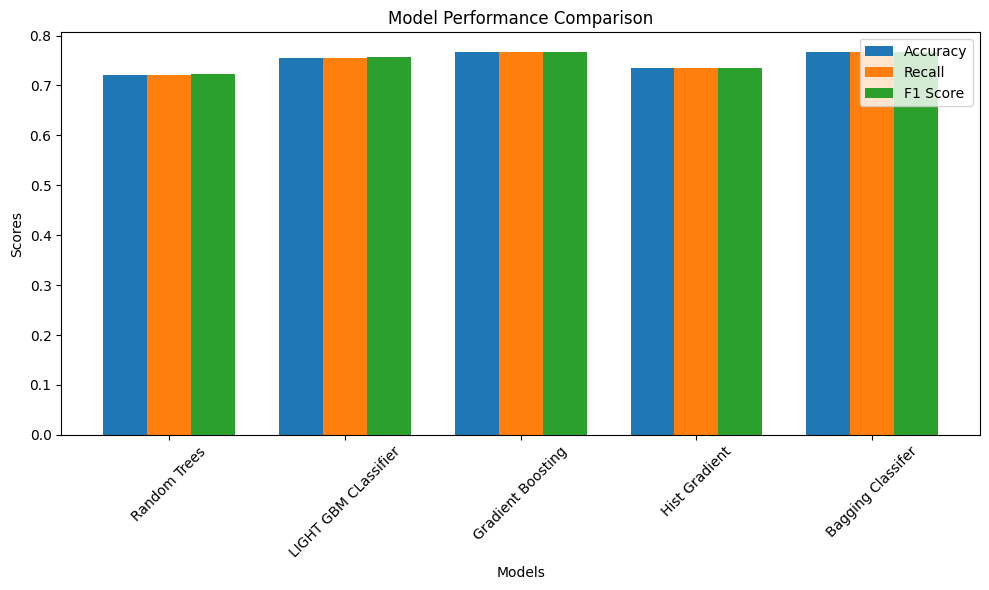

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

index = np.arange(len(model_names))
rects1 = plt.bar(index, accuracy_scores, bar_width, label='Accuracy')
rects2 = plt.bar(index + bar_width, recall_scores, bar_width, label='Recall')
rects3 = plt.bar(index + 2 * bar_width, f_scores, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width, model_names)
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the test, we can see that the we have avg accuracy , reacll and f1 score of 75% which is good considering that the dataset does not have many data columns that has high correlation with each other.

# ***Neural Network. ***


---


This part of project is just to show the comparsion between Neural Network and Supervised Learning model.

Every step performed for Supervised learning is performed for Neural Network as well.

In [15]:
model7 = GridSearchCV(MLPClassifier(learning_rate='adaptive'),param_grid=param_grid_mlp,cv=15,verbose=3)

In [ ]:
model7.fit(X_train,y_train)

Fitting 15 folds for each of 8 candidates, totalling 120 fits
[CV 1/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  21.5s
[CV 2/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.528 total time=  22.1s
[CV 3/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  26.0s
[CV 4/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.530 total time=  26.2s
[CV 5/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  25.5s
[CV 6/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  23.4s
[CV 7/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  26.7s
[CV 8/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  25.4s
[CV 9/15] END activation=logistic, hidden_layer_sizes=100, solver=sgd;, score=0.529 total time=  26.9s
[CV 10/15] 

GridSearchCV(cv=15, estimator=MLPClassifier(learning_rate='adaptive'),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [100, 200],
                         'solver': ['sgd', 'adam']},
             verbose=3)

In [16]:
mod1 = BaggingClassifier(max_samples=0.9, n_estimators=1000)
mod2 = HistGradientBoostingClassifier(l2_regularization=1.0)
mod3 = GradientBoostingClassifier(max_depth=9, max_features='sqrt', n_estimators=500)
mod4 = RandomForestClassifier(max_depth=10, n_estimators=500)
mod5 = ExtraTreesClassifier(max_depth=10, max_features=None, n_estimators=1000)
mod6 = LGBMClassifier(class_weight='balanced', max_depth=10, n_estimators=1000,force_col_wise =True,verbose=-1)
mod7 = MLPClassifier(activation='logistic', hidden_layer_sizes=100,
              learning_rate='adaptive')

In [ ]:
mod7.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=100,
              learning_rate='adaptive')

In [ ]:
y_pred_nn = mod7.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_nn)

0.583986562150056

Here comes the main part of the Project.

The following this are done here:

- we have models with best paramter for better result so we keep them together in a dict.

- we perform Stratisfiedkfold cross valdiation to see how our models perform on different splits of data.

- we then measure accuracy, recall and f1 score of each model on each splits.

- we then, look if there is higher or lower limit on how our model performed.

In [17]:
model_nn = {
    ('Bagging Classifier', mod1),
    ('Hist Gradient', mod2),
    ('Gradient Boosting', mod3),
    ('Random Forest', mod4),
    ('LIGHT GBM Classifier', mod6),
    ('Neural Network',mod7)
}


In [45]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
for train_indx,test_indx in skf.split(X,y):
    X_train,X_test = X.iloc[train_indx], X.iloc[test_indx]
    y_train,y_test = y.iloc[train_indx], y.iloc[test_indx]
    for name,model in model_nn:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(f"{name} :: Accuracy Score {accuracy_score(y_test,y_pred)}")
        print(f"{name} :: Recall Score {recall_func(y_test,y_pred,average='weighted')}")
        print(f"{name} :: F1 Score {f1_score(y_test,y_pred,average='weighted')}\n")

Random Trees :: Accuracy Score 0.7222844344904815
Random Trees :: Recall Score 0.7222844344904815
Random Trees :: F1 Score 0.7244841724865551

Gradient Boosting :: Accuracy Score 0.7609182530795073
Gradient Boosting :: Recall Score 0.7609182530795073
Gradient Boosting :: F1 Score 0.7604149653943656

Hist Gradient :: Accuracy Score 0.7304031354983203
Hist Gradient :: Recall Score 0.7304031354983203
Hist Gradient :: F1 Score 0.7309909429144325

LIGHT GBM Classifier :: Accuracy Score 0.7593784994400896
LIGHT GBM Classifier :: Recall Score 0.7593784994400896
LIGHT GBM Classifier :: F1 Score 0.7607244936728211

Bagging Classifier :: Accuracy Score 0.7637178051511758
Bagging Classifier :: Recall Score 0.7637178051511758
Bagging Classifier :: F1 Score 0.7638580522500983

Neural Network :: Accuracy Score 0.5863661814109743
Neural Network :: Recall Score 0.5863661814109743
Neural Network :: F1 Score 0.5333936712154774

Random Trees :: Accuracy Score 0.7274254514909702
Random Trees :: Recall Sco

**The highest accuracy rate of 76.7% and Lowest of 58% for Neural Network**


Aggregated model performance metrics data

| Model                  | Accuracy Score | Recall Score | F1 Score |
|------------------------|----------------|--------------|----------|
| Bagging Classifier     | 0.76756        | 0.76756      | 0.76776  |
| Gradient Boosting      | 0.76802        | 0.76802      | 0.76754  |
| Hist Gradient          | 0.73390        | 0.73390      | 0.73454  |
| LIGHT GBM Classifier   | 0.75702        | 0.75702      | 0.75824  |
| Neural Network         | 0.58646        | 0.58646      | 0.53494  |
| Random Trees           | 0.72385        | 0.72385      | 0.72463  |

Here it is easy to view that the Neural Network model was not able to compete with the supervised model for this dataset.

Since, classification algorithm is not sensitive to scaling, use of scalar only tend to bring down the accuracy rate

And since,the dataset was already filled with values that were scaled down, further scaling caused the accuracy rate to go down for most of the algorithm
As it is shown above.

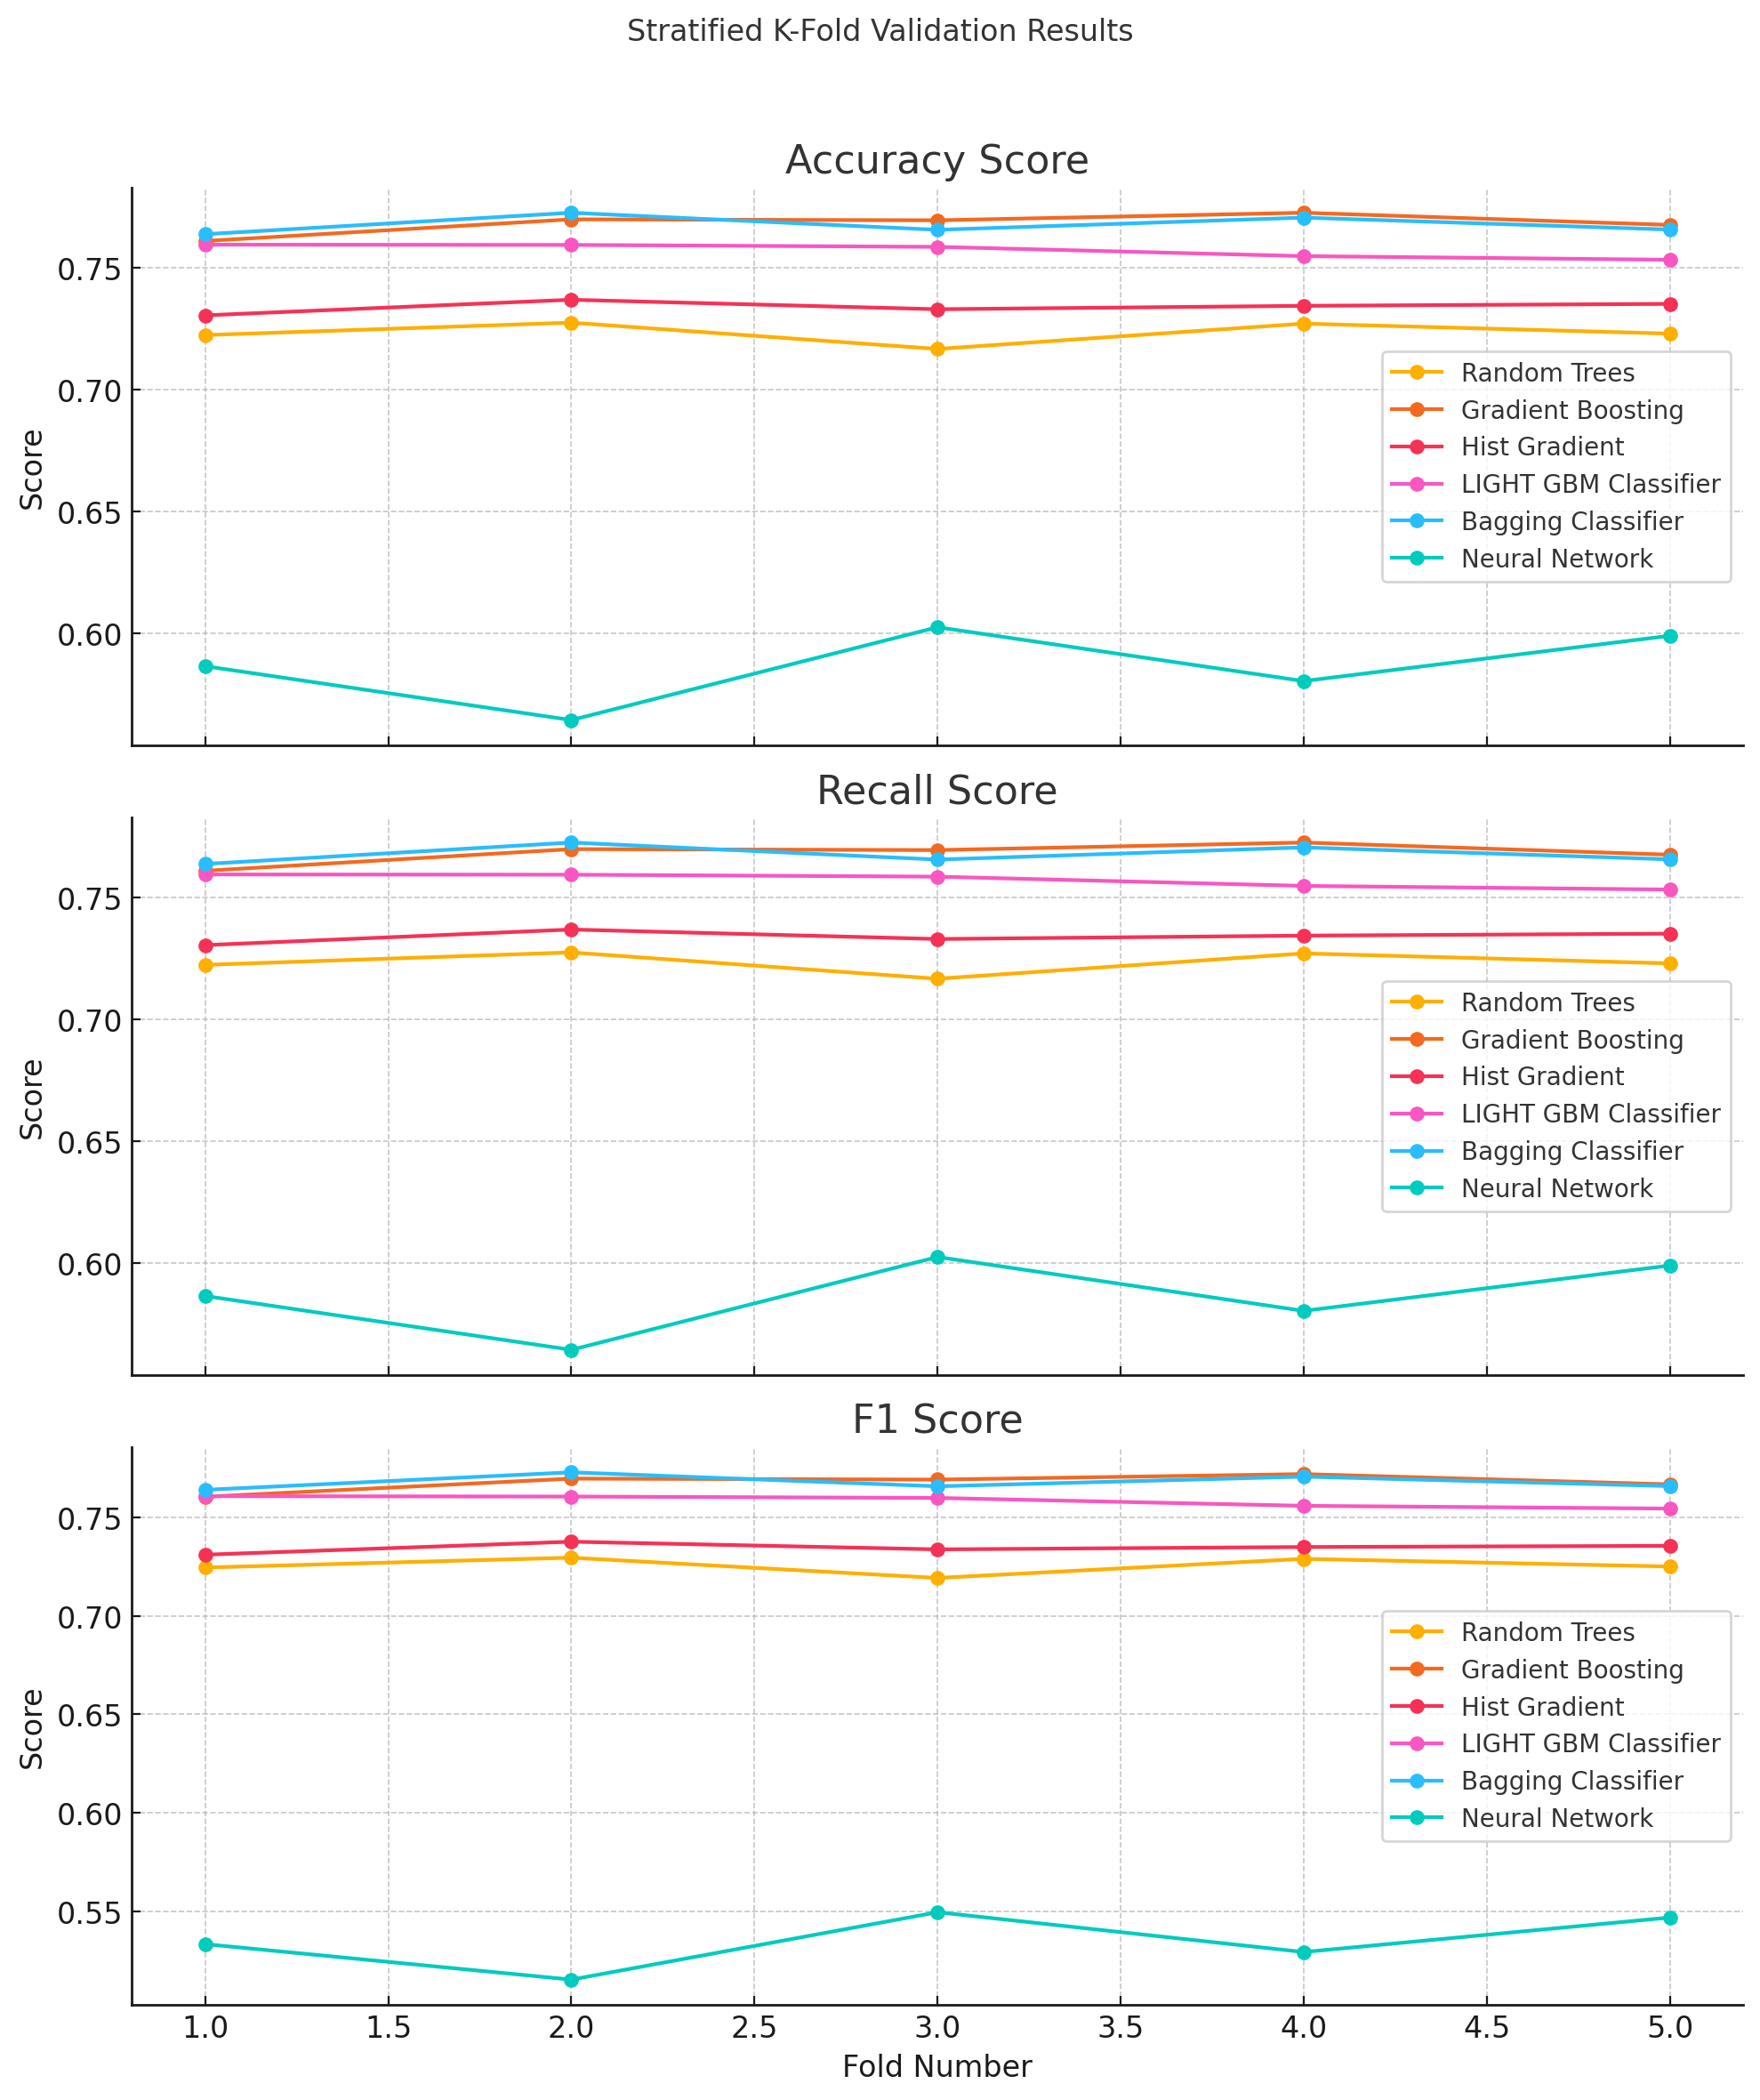

Gradient Boosting :: Accuracy Score 0.7655375139977604
Gradient Boosting :: Recall Score 0.7655375139977604
Gradient Boosting :: F1 Score 0.7650043030261147



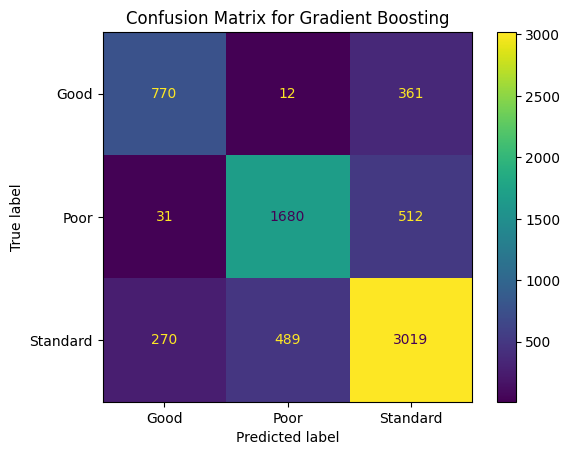

Random Trees :: Accuracy Score 0.7239641657334827
Random Trees :: Recall Score 0.7239641657334827
Random Trees :: F1 Score 0.7268193408824506



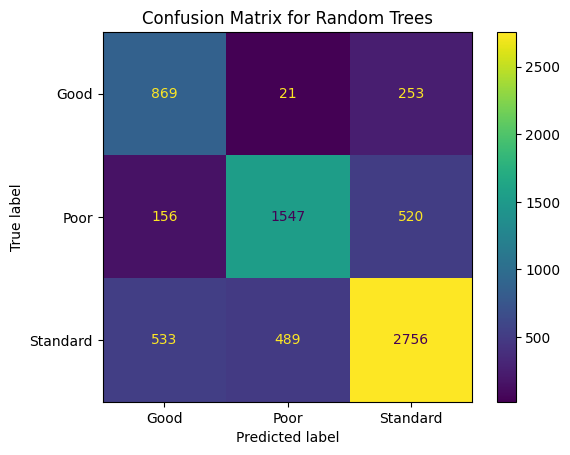

Hist Gradient :: Accuracy Score 0.7316629339305711
Hist Gradient :: Recall Score 0.7316629339305711
Hist Gradient :: F1 Score 0.7326770785684695



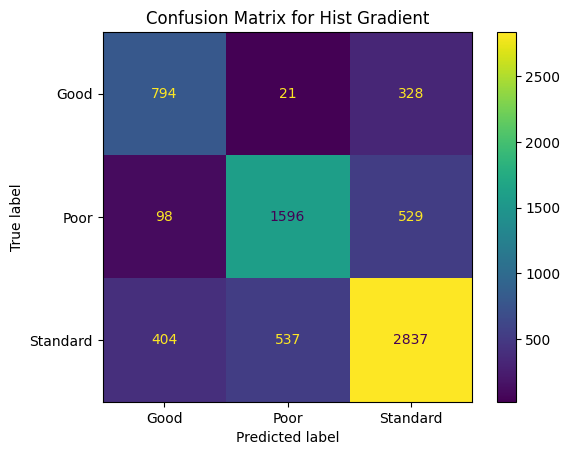

Neural Network :: Accuracy Score 0.6023236282194849
Neural Network :: Recall Score 0.6023236282194849
Neural Network :: F1 Score 0.5499747685297863



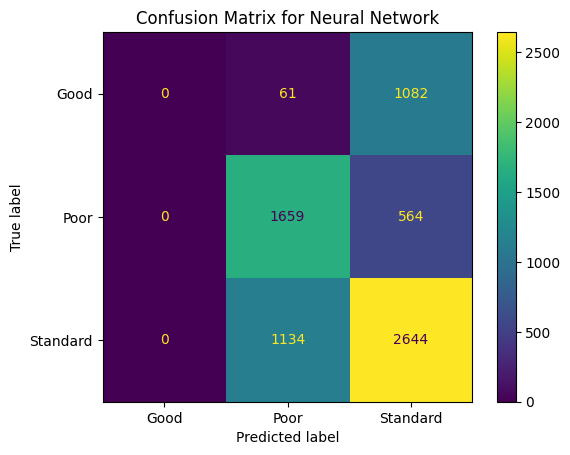

Bagging Classifier :: Accuracy Score 0.7658174692049272
Bagging Classifier :: Recall Score 0.7658174692049272
Bagging Classifier :: F1 Score 0.766164665573636



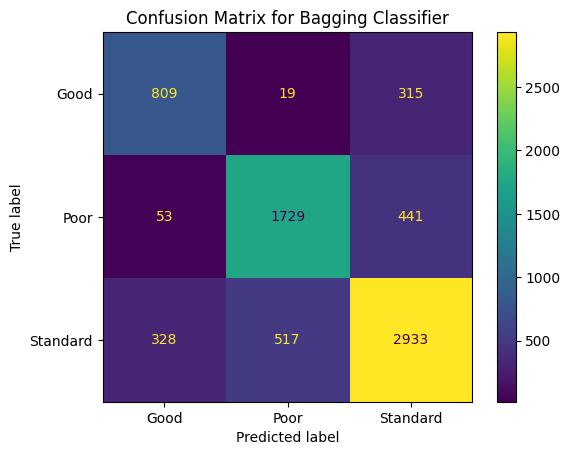

LIGHT GBM Classifier :: Accuracy Score 0.7554591265397537
LIGHT GBM Classifier :: Recall Score 0.7554591265397537
LIGHT GBM Classifier :: F1 Score 0.7567202434287902



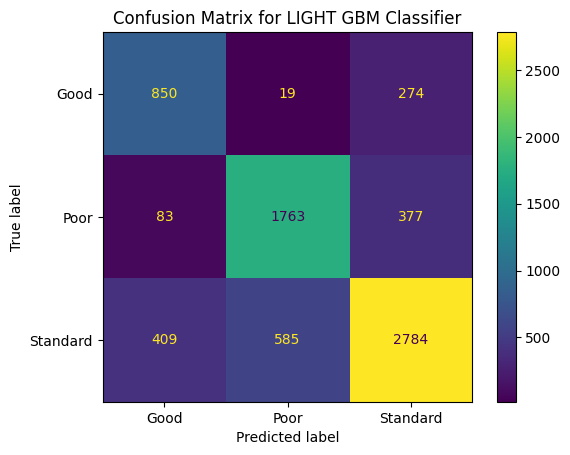

In [19]:

for name,model in model_nn:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name} :: Accuracy Score {accuracy_score(y_test,y_pred)}")
    print(f"{name} :: Recall Score {recall_func(y_test,y_pred,average='weighted')}")
    print(f"{name} :: F1 Score {f1_score(y_test,y_pred,average='weighted')}\n")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

For each k - fold we can see the difference in how accuracy score, recall score and f1 score differs from in different models.

In [20]:
from sklearn.preprocessing import label_binarize

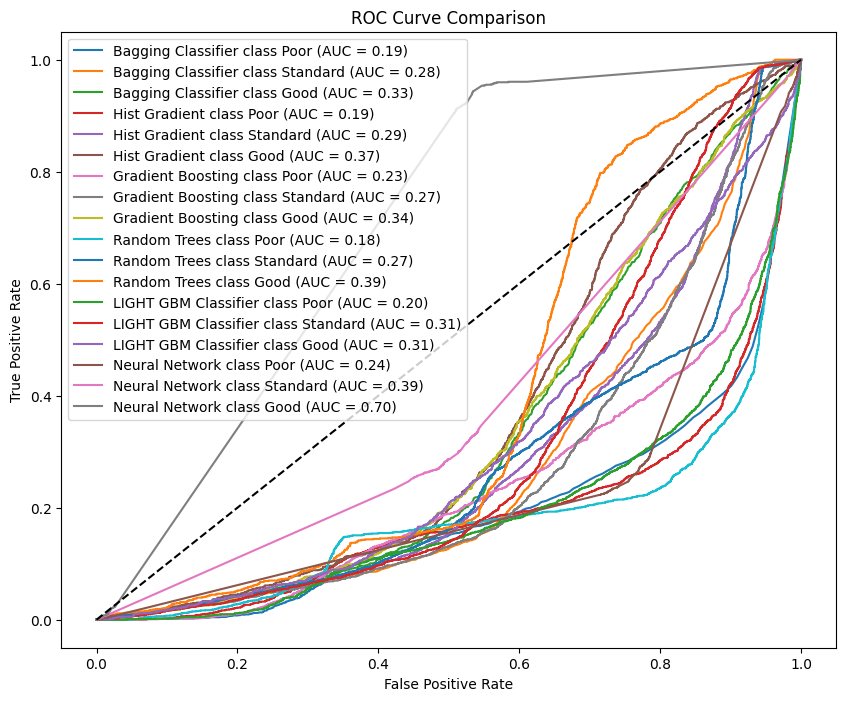

In [ ]:
classes = list(set(y_test)) 
if len(classes) > 2:
    y_test_binarized = label_binarize(y_test, classes=classes)
else:
    y_test_binarized = y_test


models = {
    'Bagging Classifier': mod1,
    'Hist Gradient': mod2,
    'Gradient Boosting': mod3,
    'Random Trees': mod4,
    'LIGHT GBM Classifier': mod6,
    'Neural Network': mod7
}

for name, model in models.items():
    model.fit(X_train, y_train)  

plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] > 2:
            for i, class_label in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f'{name} class {class_label} (AUC = {roc_auc:.2f})')
        else:
            y_pred_proba = y_pred_proba[:, 1] 
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    else:
        print(f"{name} does not support predict_proba method.")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

The ROC curve plot shows that the neural network model performs better at classifying "Good" instances but struggles with "Poor" and "Standard". Overall, the AUC values suggest that while the models have some discriminative power, there's room for significant improvement. Adjustments in model architecture, training data, or adopting ensemble strategies may help improve performance across all classes.

While the AUC score reading shows that the Neural Network Might be a good classififer for "good" labels but that is not the case since the threshold is of 0.5, any data greater than the threshold itself is reversed meaning that, even though the reading is 0.70, the flipside is 0.30 which makes it an average model compared to the other models. 

So, it was better to not add it into the final model , as the voting classifer might have lower accuracy and overall performance because of one model which has relatively less accuracy than the others. 

# **FINAL PART OF PROJECT**


---
To explain on advantages of each classification models, it is better to use voting classifier to get the best output of all the other model from voting. As each model have been hyper tuned to get the best socre possible for this dataset, we cannot choose one.

***So, it is better to choose all and get the result from best model by voting. ***


In [34]:
model_nn = [
    ('Bagging Classifier', mod1),
    ('Hist Gradient', mod2),
    ('Gradient Boosting', mod3),
    ('Random Forest', mod4),
    ('LIGHT GBM Classifier', mod6)
]


In [22]:
voting_clf = VotingClassifier(estimators=model_nn,voting='hard')

In [ ]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Bagging Classifier',
                              BaggingClassifier(max_samples=0.9,
                                                n_estimators=1000)),
                             ('Hist Gradient',
                              HistGradientBoostingClassifier(l2_regularization=1.0)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(max_depth=9,
                                                         max_features='sqrt',
                                                         n_estimators=500)),
                             ('Random Trees',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=500)),
                             ('LIGHT GBM Classifier',
                              LGBMClassifier(class_weight='balanced',
                                             force_col_wise=True, max_depth=10,
                                             n_estimators=1000, verbose=-1)),
                             ('Neural Network',
                              MLPClassifier(activation='logistic',
                                            hidden_layer_sizes=100,
                                            learning_rate='adaptive'))])

In [ ]:
y_prediction = voting_clf.predict(X_test)

In [ ]:
print(f"Accuracy score :: {accuracy_score(y_test,y_prediction)}")
print(f"f1 score :: {f1_score(y_test,y_prediction,average='weighted')}")

Accuracy score :: 0.7592385218365062
f1 score :: 0.7602493803209591


We can see the difference in the accuracy of the voting classifier in usig different models as the estimators itself/.The one with No Neural Network performs a lot better than the one with it. 
The One with No Neural Network is our fnal model. 

In [41]:
voting_c = VotingClassifier(estimators=model_nn,voting="hard",weights=[2.5,1,3,1.5,2])
voting = make_pipeline(StandardScaler(),voting_c)
voting.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('Bagging Classifier',
                                               BaggingClassifier(max_samples=0.9,
                                                                 n_estimators=1000)),
                                              ('Hist Gradient',
                                               HistGradientBoostingClassifier(l2_regularization=1.0)),
                                              ('Gradient Boosting',
                                               GradientBoostingClassifier(max_depth=9,
                                                                          max_features='sqrt',
                                                                          n_estimators=500)),
                                              ('Random Trees',
                                               RandomForestClassifier(max_depth=10,
                                                                      n_estimators=500)),
                                              ('LIGHT GBM Classifier',
                                               LGBMClassifier(class_weight='balanced',
                                                              force_col_wise=True,
                                                              max_depth=10,
                                                              n_estimators=1000,
                                                              verbose=-1))],
                                  weights=[2.5, 1, 3, 1.5, 2]))])

Accuracy score :: 0.7725363941769317
f1 score :: 0.7729602143940825


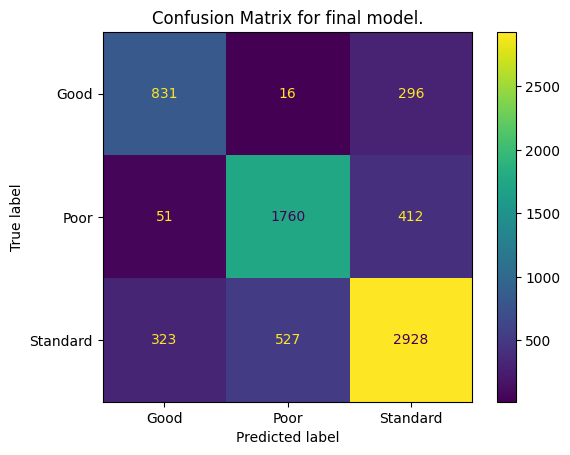

In [42]:
v_pred = voting.predict(X_test)
print(f"Accuracy score :: {accuracy_score(y_test,v_pred)}")
print(f"f1 score :: {f1_score(y_test,v_pred,average='weighted')}")
ConfusionMatrixDisplay.from_predictions(y_test,v_pred)
plt.title(f"Confusion Matrix for final model.")
plt.show()

With voting classififer we get the score as shown above which is good for a classifier


# **DEPLOYMENT**


---
with more data, it is possible for this model to be deployed by credit card companies or someone who wants to help other people who might need to get their credit checked based on simple data they have.

On additional note, we can use online learning to get this model perform even better as we continously get new data and training this model on newer data will help verify the usefullness of this data even more.

If we are to get continous data using online learning, we need to constantly update the model and train it on new data.

But if we choose to use offline learning then, once we have a batch of new data we can train the model in that new batch and deploy it again. And repeat the process over and over again.
